# 1. MMDetection 설치 및 Oxford Pet 데이터셋 다운로드

## MMDetection 설치

In [ ]:
# MMCV 설치
# torch 버전이 달라지면 달라진 버전을 입력해주어야 함
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu111/torch1.10.0/index.html
# MMDetection git clolne
!git clone https://github.com/open-mmlab/mmdetection.git
# MMDetection 설치
!cd mmdetection; python setup.py install

In [1]:
# 임포트하기 전에 '런타임 다시 시작'을 해야 함
from mmdet.apis import init_detector, inference_detector
import mmcv

## Oxford Pet 데이터셋 다운로드

In [ ]:
!wget https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
!wget https://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz

In [3]:
# /content/data 디렉터리 생성
!mkdir /content/data
# /content/data 디렉터리에 다운로드 받은 압축 파일 풀기
!tar -xvf images.tar.gz -C /content/data > /dev/null
!tar -xvf annotations.tar.gz -C /content/data > /dev/null

## Oxford Pet 데이터 둘러보기

In [4]:
!ls -lia ./data/images/Abyssinian*.jpg

5248306 -rwxr-xr-x 1 1001 1001 126923 Jun 18  2012 ./data/images/Abyssinian_100.jpg
5250851 -rwxr-xr-x 1 1001 1001  49023 Jun 18  2012 ./data/images/Abyssinian_101.jpg
5251927 -rwxr-xr-x 1 1001 1001 165505 Jun 18  2012 ./data/images/Abyssinian_102.jpg
5252699 -rwxr-xr-x 1 1001 1001 132937 Jun 18  2012 ./data/images/Abyssinian_103.jpg
5252849 -rwxr-xr-x 1 1001 1001  34907 Jun 18  2012 ./data/images/Abyssinian_104.jpg
5251230 -rwxr-xr-x 1 1001 1001 141823 Jun 18  2012 ./data/images/Abyssinian_105.jpg
5247389 -rwxr-xr-x 1 1001 1001 197092 Jun 18  2012 ./data/images/Abyssinian_106.jpg
5252740 -rwxr-xr-x 1 1001 1001 150955 Jun 18  2012 ./data/images/Abyssinian_107.jpg
5249681 -rwxr-xr-x 1 1001 1001 120641 Jun 18  2012 ./data/images/Abyssinian_108.jpg
5251219 -rwxr-xr-x 1 1001 1001  13601 Jun 18  2012 ./data/images/Abyssinian_109.jpg
5246849 -rwxr-xr-x 1 1001 1001  96294 Jun 18  2012 ./data/images/Abyssinian_10.jpg
5249634 -rwxr-xr-x 1 1001 1001  27734 Jun 18  2012 ./data/images/Abyssinian_1

In [5]:
!ls -lia ./data/annotations/xmls/Abyssinian*.xml

5254163 -rw-r--r-- 1 501 staff 495 Jun 29  2012 ./data/annotations/xmls/Abyssinian_100.xml
5254164 -rw-r--r-- 1 501 staff 494 Jun 29  2012 ./data/annotations/xmls/Abyssinian_101.xml
5254165 -rw-r--r-- 1 501 staff 494 Jun 29  2012 ./data/annotations/xmls/Abyssinian_102.xml
5254166 -rw-r--r-- 1 501 staff 495 Jun 29  2012 ./data/annotations/xmls/Abyssinian_103.xml
5254167 -rw-r--r-- 1 501 staff 496 Jun 29  2012 ./data/annotations/xmls/Abyssinian_105.xml
5254168 -rw-r--r-- 1 501 staff 499 Jun 29  2012 ./data/annotations/xmls/Abyssinian_106.xml
5254169 -rw-r--r-- 1 501 staff 494 Jun 29  2012 ./data/annotations/xmls/Abyssinian_107.xml
5254170 -rw-r--r-- 1 501 staff 494 Jun 29  2012 ./data/annotations/xmls/Abyssinian_108.xml
5254171 -rw-r--r-- 1 501 staff 493 Jun 29  2012 ./data/annotations/xmls/Abyssinian_109.xml
5254162 -rw-r--r-- 1 501 staff 494 Jun 29  2012 ./data/annotations/xmls/Abyssinian_10.xml
5254173 -rw-r--r-- 1 501 staff 493 Jun 29  2012 ./data/annotations/xmls/Abyssinian_110.xml


In [6]:
!cat ./data/annotations/xmls/Abyssinian_1.xml

<annotation><folder>OXIIIT</folder><filename>Abyssinian_1.jpg</filename><source><database>OXFORD-IIIT Pet Dataset</database><annotation>OXIIIT</annotation><image>flickr</image></source><size><width>600</width><height>400</height><depth>3</depth></size><segmented>0</segmented><object><name>cat</name><pose>Frontal</pose><truncated>0</truncated><occluded>0</occluded><bndbox><xmin>333</xmin><ymin>72</ymin><xmax>425</xmax><ymax>158</ymax></bndbox><difficult>0</difficult></object></annotation>


In [7]:
import glob
import xml.etree.ElementTree as ET

def get_bboxes_from_xml_temp(xml_file):
  '''annotation xml을 파싱해서 경계 박스 정보 추출'''
  tree = ET.parse(xml_file) # xml을 파싱해서 트리 생성 ---①
  root = tree.getroot() # 트리의 루트 ---②
  object_names = [] # 객체명
  bboxes = [] # 경계 박스 좌표
   
  # 트리에 있는 모든 'object' Element를 찾아 순회 ---③
  for obj in root.findall('object'): 
    object_name = obj.find('name').text # <name> 태그의 문자열
    bbox = obj.find('bndbox') # 경계 박스
    x_min = int(bbox.find('xmin').text)
    y_min = int(bbox.find('ymin').text)
    x_max = int(bbox.find('xmax').text)
    y_max = int(bbox.find('ymax').text)

    object_names.append(object_name)
    bboxes.append([x_min, y_min, x_max, y_max])

  return object_names, bboxes

In [8]:
get_bboxes_from_xml_temp('./data/annotations/xmls/Abyssinian_1.xml')

(['cat'], [[333, 72, 425, 158]])

# 3. 데이터 준비

In [9]:
# 훈련, 검증용 annotation 메타 파일
!cd ./data/annotations
!cat trainval.txt

cat: trainval.txt: No such file or directory


In [10]:
import pandas as pd

pet_df = pd.read_csv('./data/annotations/trainval.txt', sep=' ', header=None, names=['img_name', 'class_id', 'etc1', 'etc2'])
pet_df.head()

,img_name,class_id,etc1,etc2
0,Abyssinian_100,1,1,1
1,Abyssinian_101,1,1,1
2,Abyssinian_102,1,1,1
3,Abyssinian_103,1,1,1
4,Abyssinian_104,1,1,1


In [11]:
pet_df['class_id'].value_counts()

1     100
28    100
21    100
22    100
24    100
25    100
26    100
27    100
29    100
2     100
30    100
31    100
32    100
34    100
35    100
36    100
20    100
19    100
18    100
17    100
3     100
4     100
5     100
6     100
7     100
9     100
10    100
11    100
14    100
15    100
16    100
37    100
33     99
8      96
13     96
23     96
12     93
Name: class_id, dtype: int64

In [12]:
pet_df['class_name'] = pet_df['img_name'].apply(lambda x:x[:x.rfind('_')])
pet_df.head()

,img_name,class_id,etc1,etc2,class_name
0,Abyssinian_100,1,1,1,Abyssinian
1,Abyssinian_101,1,1,1,Abyssinian
2,Abyssinian_102,1,1,1,Abyssinian
3,Abyssinian_103,1,1,1,Abyssinian
4,Abyssinian_104,1,1,1,Abyssinian


In [13]:
x = 'Abyssinian_100'
print(x.rfind('_')) # '_'까지 인덱스
print(x[:x.rfind('_')]) # 객체 클래스명

10
Abyssinian


In [14]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(pet_df, test_size=0.1, stratify=pet_df['class_id'], random_state=42)

In [15]:
print(train_df['class_id'].value_counts(), val_df['class_id'].value_counts())

5     90
20    90
14    90
25    90
30    90
29    90
15    90
21    90
1     90
7     90
17    90
31    90
28    90
11    90
6     90
19    90
34    90
18    90
9     90
2     90
3     90
16    90
32    90
4     90
35    90
10    90
24    90
27    90
26    90
37    90
22    90
36    90
33    89
8     87
13    86
23    86
12    84
Name: class_id, dtype: int64 3     10
4     10
5     10
36    10
22    10
29    10
35    10
34    10
37    10
14    10
24    10
28    10
25    10
32    10
2     10
21    10
30    10
10    10
6     10
17    10
7     10
20    10
19    10
23    10
1     10
33    10
27    10
16    10
31    10
11    10
15    10
18    10
9     10
13    10
26    10
8      9
12     9
Name: class_id, dtype: int64


In [16]:
# img_name순으로 정렬
train_df = train_df.sort_values(by='img_name')
val_df = val_df.sort_values(by='img_name')

In [17]:
# ann_file로 주어지는 메타파일은 되도록 최상단 디렉터리에 저장하는 게 바람직
train_df['img_name'].to_csv('./data/train.txt', sep=' ', header=False, index=False)
val_df['img_name'].to_csv('./data/val.txt', sep=' ', header=False, index=False)

In [ ]:
# 훈련 annotation 보기
!cat ./data/train.txt

## 데이터셋을 중립 데이터 형태로 변환

In [19]:
def get_bboxes_from_xml(anno_dir, xml_file):
  '''annotation xml을 파싱해서 경계 박스 정보 추출'''
  anno_xml_file = os.path.join(anno_dir, xml_file)
  tree = ET.parse(anno_xml_file) # xml을 파싱해서 트리 생성
  root = tree.getroot() # 트리의 루트
  object_names = [] # 객체명
  bboxes = [] # 경계 박스 좌표

  # 트리에 있는 모든 'object' Element를 찾아 순회
  for obj in root.findall('object'):
    # 객체 클래스명은 파일명에서 추출 ---①
    object_name = xml_file[:xml_file.rfind('_')]
    bbox = obj.find('bndbox') # 경계 박스
    x_min = int(bbox.find('xmin').text)
    y_min = int(bbox.find('ymin').text)
    x_max = int(bbox.find('xmax').text)
    y_max = int(bbox.find('ymax').text)
    
    object_names.append(object_name)
    bboxes.append([x_min, y_min, x_max, y_max])

  return object_names, bboxes

In [20]:
import copy
import os
import numpy as np
from mmdet.datasets.builder import DATASETS
from mmdet.datasets.custom import CustomDataset
import cv2

# 클래스는 pet_df의 'class_name' 열에 있는 고윳값으로 지정
PET_CLASSES = pet_df['class_name'].unique().tolist()

@DATASETS.register_module(force=True) # PetDataset 객체를 MMDetection 프레임워크에 등록
class PetDataset(CustomDataset):
  CLASSES = PET_CLASSES # 클래스 레이블 지정 ---①

  # CustomDataset의 load_annotations를 오버라이딩(재정의)
  def load_annotations(self, ann_file):
    cat2label = {k:i for i, k in enumerate(self.CLASSES)} # {클래스명: 클래스ID}로 구성된 딕셔너리
    image_id_list = mmcv.list_from_file(self.ann_file) # 이미지ID 리스트 
    # 포맷 중립 데이터를 담을 list 객체
    data_infos = [] # 포맷 중립 데이터를 담을 리스트 객체

    # image_id_list를 순회하며 이미지마다 포맷 중립 데이터로 변환
    for image_id in image_id_list:
      filename = f'{self.img_prefix}/{image_id}.jpg' # 파일명

      # filename 이미지를 직접 불러와 원본 이미지의 너비, 높이 구하기 
      img = cv2.imread(filename)
      height, width = img.shape[0], img.shape[1] # 이미지 높이와 너비

      # 개별 이미지의 annotation 정보 저장용 딕셔너리 생성 
      data_info = {'filename': str(image_id) + '.jpg', # 파일명(확장자 포함)
                   'width': width,   # 이미지 너비
                   'height': height} # 이미지 높이

      # 개별 annotation XML 파일이 있는 서브 디렉토리의 prefix 변환 
      label_prefix = self.img_prefix.replace('images', 'annotations')
      # 개별 annotation 파일을 한 line 씩 읽어서 list 로드( annotation XML파일이 xmls 아래 있음에 유의)
      anno_xml_file = os.path.join(label_prefix, 'xmls/' + str(image_id) + '.xml')

      # 메타 파일에는 이름이 있으나 실제로는 존재하지 않는 XML이 있으므로 이는 제외 
      if not os.path.exists(anno_xml_file):
          continue
      
      anno_dir = os.path.join(label_prefix, 'xmls')
      # get_bboxes_from_xml() 함수를 이용해 개별 XML 파일에 있는 이미지의 객체명과 경계 박스 좌표를 list 객체로 생성 
      object_names, bboxes = get_bboxes_from_xml(anno_dir, str(image_id) + '.xml')
                  
      gt_bboxes = []        # 실제 경계 박스
      gt_labels = []        # 실제 클래스 레이블명
      gt_bboxes_ignore = [] # 훈련에 사용하지 않을 경계 박스
      gt_labels_ignore = [] # 훈련에 사용하지 않을 클래스 레이블명

      # 경계 박스와 클래스 레이블명 저장
      for object_name, bbox in zip(object_names, bboxes):
        # 만약 object_name이 객체 클래스명이면, gt_bboxes와 gt_labels에 추가
        # 그렇지 않으면 gt_bboxes_ignore, gt_labels_ignore에 추가
        if object_name in cat2label:
            gt_bboxes.append(bbox)
            gt_labels.append(cat2label[object_name]) # gt_labels에는 class id를 저장
        else:
            gt_bboxes_ignore.append(bbox)
            gt_labels_ignore.append(-1) # 객체가 아니면 class_id는 -1(배경이라는 뜻)
      
      # 이미지별 annotation 정보를 갖는 딕셔너리 생성
      anno = {
        'bboxes': np.array(gt_bboxes, dtype=np.float32).reshape(-1, 4),
        'labels': np.array(gt_labels, dtype=np.compat.long),
        'bboxes_ignore': np.array(gt_bboxes_ignore, dtype=np.float32).reshape(-1, 4),
        'labels_ignore': np.array(gt_labels_ignore, dtype=np.compat.long)
      }
      
      data_info.update(ann=anno) # data_info에 anno 정보 업데이트
      data_infos.append(data_info) # data_infos에 data_info 추가

    return data_infos # 중립 데이터 형태로 변환한 데이터셋 반환

## 디버깅을 위한 데이터셋 클래스

In [21]:
class PetDataset_debug():
  ''' 디버깅 용도로 CustomDataset을 흉내낸 클래스를 생성하여 다양한 테스트 수행 가능 '''
  CLASSES = PET_CLASSES
  # 생성자 함수 생성.---①
  def __init__(self, data_root, ann_file, img_prefix):
      self.data_root = data_root
      self.ann_file = os.path.join(data_root, ann_file)
      self.img_prefix = os.path.join(data_root, img_prefix)
      self.data_infos = self.load_annotations(self.ann_file)

  def load_annotations(self, ann_file):
    cat2label = {k:i for i, k in enumerate(self.CLASSES)}
    image_id_list = mmcv.list_from_file(self.ann_file) 
    # 포맷 중립 데이터를 담을 list 객체
    data_infos = [] # 포맷 중립 데이터를 담을 리스트 객체

    # image_id_list를 순회하며 이미지마다 포맷 중립 데이터로 변환
    for image_id in image_id_list:
      filename = f'{self.img_prefix}/{image_id}.jpg' # 파일명

      # filename 이미지를 직접 불러와 원본 이미지의 너비, 높이 구하기 
      img = cv2.imread(filename)
      height, width = img.shape[0], img.shape[1] # 이미지 높이와 너비

      # 개별 이미지의 annotation 정보 저장용 딕셔너리 생성 
      data_info = {'filename': str(image_id) + '.jpg', # 파일명(확장자 포함)
                   'width': width,   # 이미지 너비
                   'height': height} # 이미지 높이

      # 개별 annotation XML 파일이 있는 서브 디렉토리의 prefix 변환 
      label_prefix = self.img_prefix.replace('images', 'annotations')
      # 개별 annotation 파일을 한 line 씩 읽어서 list 로드( annotation XML파일이 xmls 아래 있음에 유의)
      anno_xml_file = os.path.join(label_prefix, 'xmls/' + str(image_id) + '.xml')

      # 메타 파일에는 이름이 있으나 실제로는 존재하지 않는 XML이 있으므로 이는 제외 
      if not os.path.exists(anno_xml_file):
          continue
      
      anno_dir = os.path.join(label_prefix, 'xmls')
      # get_bboxes_from_xml() 함수를 이용해 개별 XML 파일에 있는 이미지의 객체명과 경계 박스 좌표를 list 객체로 생성 
      object_names, bboxes = get_bboxes_from_xml(anno_dir, str(image_id) + '.xml')
                  
      gt_bboxes = []        # 실제 경계 박스
      gt_labels = []        # 실제 클래스 레이블명
      gt_bboxes_ignore = [] # 훈련에 사용하지 않을 경계 박스
      gt_labels_ignore = [] # 훈련에 사용하지 않을 클래스 레이블명

      # 경계 박스와 클래스 레이블명 저장
      for object_name, bbox in zip(object_names, bboxes):
        # 만약 object_name이 객체 클래스명이면, gt_bboxes와 gt_labels에 추가
        # 그렇지 않으면 gt_bboxes_ignore, gt_labels_ignore에 추가
        if object_name in cat2label:
            gt_bboxes.append(bbox)
            gt_labels.append(cat2label[object_name]) # gt_labels에는 class id를 저장
        else:
            gt_bboxes_ignore.append(bbox)
            gt_labels_ignore.append(-1) # 객체가 아니면 class_id는 -1(배경이라는 뜻)
      
      # 이미지별 annotation 정보를 갖는 딕셔너리 생성
      anno = {
        'bboxes': np.array(gt_bboxes, dtype=np.float32).reshape(-1, 4),
        'labels': np.array(gt_labels, dtype=np.compat.long),
        'bboxes_ignore': np.array(gt_bboxes_ignore, dtype=np.float32).reshape(-1, 4),
        'labels_ignore': np.array(gt_labels_ignore, dtype=np.compat.long)
      }
      
      data_info.update(ann=anno) # data_info에 anno 정보 업데이트
      data_infos.append(data_info) # data_infos에 data_info 추가

    return data_infos # 중립 데이터 형태로 변환한 데이터셋 반환

In [22]:
# 디버깅 용도의 클래스 생성
train_debug = PetDataset_debug(data_root='/content/data', ann_file='train.txt', img_prefix='images')

# 첫 두 개 데이터만 출력
print(train_debug.data_infos[:2]) 

[{'filename': 'Abyssinian_10.jpg', 'width': 375, 'height': 500, 'ann': {'bboxes': array([[ 72., 105., 288., 291.]], dtype=float32), 'labels': array([0]), 'bboxes_ignore': array([], shape=(0, 4), dtype=float32), 'labels_ignore': array([], dtype=int64)}}, {'filename': 'Abyssinian_100.jpg', 'width': 394, 'height': 500, 'ann': {'bboxes': array([[151.,  71., 335., 267.]], dtype=float32), 'labels': array([0]), 'bboxes_ignore': array([], shape=(0, 4), dtype=float32), 'labels_ignore': array([], dtype=int64)}}]


# 4. Config 설정

In [23]:
# 사전 훈련 모델을 다운로드 받기 위해 mmdetection/checkpoints 디렉터리 생성 
!cd mmdetection; mkdir checkpoints
# 사전 훈련된 Faster R-CNN 다운로드
!wget -O ./mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth http://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth

--2022-04-05 02:16:00--  http://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.74.197.77
Connecting to download.openmmlab.com (download.openmmlab.com)|47.74.197.77|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 167287506 (160M) [application/octet-stream]
Saving to: ‘./mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth’

./mmdetection/check 100%[===================>] 159.54M  9.56MB/s    in 16s     

2022-04-05 02:16:16 (10.3 MB/s) - ‘./mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth’ saved [167287506/167287506]



In [24]:
# config 파일 설정
config_file = './mmdetection/configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py'
# 다운로드 받은 사전 훈련 모델을 checkpoint로 설정
checkpoint_file = './mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'

In [25]:
from mmcv import Config

cfg = Config.fromfile(config_file)

##### Oxford Pet 데이터는 훈련하는 데 시간이 오래 걸리므로 훈련된 모델을 구글 드라이브에 저장

In [26]:
# 구글 드라이브 접근을 위한 Mount 적용
import os, sys 
from google.colab import drive 

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [27]:
!mkdir "/content/gdrive/My Drive/pet_work_dir"

mkdir: cannot create directory ‘/content/gdrive/My Drive/pet_work_dir’: File exists


In [33]:
from mmdet.apis import set_random_seed

# 데이터셋의 환경 파라미터 수정
cfg.dataset_type = 'PetDataset'
cfg.data_root = '/content/data/'

# train, val, test 데이터셋에 대한 type, data_root, ann_file, img_prefix 환경 파라미터 수정
cfg.data.train.type = 'PetDataset'
cfg.data.train.data_root = '/content/data/'
# MMDetection 요구에 따라 annotation 파일은 하나여야 함
cfg.data.train.ann_file = 'train.txt'
cfg.data.train.img_prefix = 'images'

cfg.data.val.type = 'PetDataset'
cfg.data.val.data_root = '/content/data/'
cfg.data.val.ann_file = 'val.txt'
cfg.data.val.img_prefix = 'images'

# 클래스 개수 수정 (초기값=80)
cfg.model.roi_head.bbox_head.num_classes = 37
# 사전 훈련 모델 (상대 경로이므로 root 디렉터리 = mmdetection) 
cfg.load_from = 'checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'

# 학습 weight 파일로 로그를 저장하기 위한 디렉터리 설정 (상대 경로) 
cfg.work_dir = '/content/gdrive/My Drive/pet_work_dir'

cfg.optimizer.lr = 0.02 / 8 # 학습률 변경 환경 파라미터 설정 
cfg.lr_config.warmup = None # 웜업 미설정
cfg.log_config.interval = 50 # 로그 출력 인터벌 

cfg.runner.max_epochs = 5 # 에폭

# 커스텀 데이터셋을 사용하므로 그에 따른 평가 지표로 수정
cfg.evaluation.metric = 'mAP'
# 평가 인터벌 설정 (평가 시간을 줄이기 위해)
cfg.evaluation.interval = 20
# 체크포인트 인터벌 설정 (저장 용량을 줄이기 위해)
cfg.checkpoint_config.interval = 20

# 배치 크기 설정(단일 GPU별 배치 크기로 설정됨)
cfg.data.samples_per_gpu = 4

# 시드값 설정
cfg.seed = 0 
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)

# config 설정 시마다 policy값이 없어지는 버그 때문에 재설정 
cfg.lr_config.policy='step'

In [34]:
# 수정한 config를 보려면 주석 풀고 아래 코드 실행
# print(cfg.pretty_text)

# 5. 모델 훈련

In [35]:
from mmdet.datasets import build_dataset

# config에 설정된 주요 값으로 CustomDataset 생성 (훈련용 데이터셋)
datasets = [build_dataset(cfg.data.train)]

/usr/local/lib/python3.7/dist-packages/mmdet-2.23.0-py3.7.egg/mmdet/datasets/custom.py:180: UserWarning: CustomDataset does not support filtering empty gt images.
  'CustomDataset does not support filtering empty gt images.')


In [36]:
datasets

[
 PetDataset Train dataset with number of images 3303, and instance counts: 
 +-----------------------+-------+-------------------------+-------+-------------------------------+-------+---------------------+-------+---------------------------------+-------+
 | category              | count | category                | count | category                      | count | category            | count | category                        | count |
 +-----------------------+-------+-------------------------+-------+-------------------------------+-------+---------------------+-------+---------------------------------+-------+
 | 0 [Abyssinian]        | 89    | 1 [american_bulldog]    | 90    | 2 [american_pit_bull_terrier] | 90    | 3 [basset_hound]    | 90    | 4 [beagle]                      | 90    |
 | 5 [Bengal]            | 89    | 6 [Birman]              | 90    | 7 [Bombay]                    | 87    | 8 [boxer]           | 90    | 9 [British_Shorthair]           | 90    |
 | 10 [chihuahua]

In [37]:
from mmdet.models import build_detector

# 훈련, 테스트 config를 반영해 모델 생성
model = build_detector(cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))
model.CLASSES = datasets[0].CLASSES

In [38]:
from mmdet.apis import train_detector

%cd mmdetection

mmcv.mkdir_or_exist(os.path.abspath(cfg.work_dir))

train_detector(model, datasets, cfg, distributed=False, validate=True) # 모델 훈련

/content/mmdetection


2022-04-05 02:18:05,038 - mmdet - INFO - load checkpoint from local path: checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
2022-04-05 02:18:05,185 - mmdet - WARNING - The model and loaded state dict do not match exactly

size mismatch for roi_head.bbox_head.fc_cls.weight: copying a param with shape torch.Size([81, 1024]) from checkpoint, the shape in current model is torch.Size([38, 1024]).
size mismatch for roi_head.bbox_head.fc_cls.bias: copying a param with shape torch.Size([81]) from checkpoint, the shape in current model is torch.Size([38]).
size mismatch for roi_head.bbox_head.fc_reg.weight: copying a param with shape torch.Size([320, 1024]) from checkpoint, the shape in current model is torch.Size([148, 1024]).
size mismatch for roi_head.bbox_head.fc_reg.bias: copying a param with shape torch.Size([320]) from checkpoint, the shape in current model is torch.Size([148]).
2022-04-05 02:18:05,193 - mmdet - INFO - Start running, host: root@f0a15470b7a0, work_dir: /conten

# 6. 훈련된 모델로 inference 수행

/usr/local/lib/python3.7/dist-packages/mmdet-2.23.0-py3.7.egg/mmdet/datasets/utils.py:70: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)


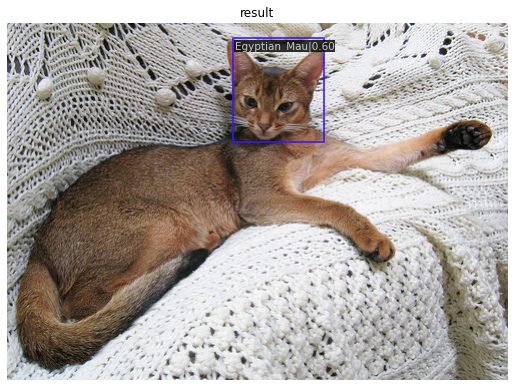

In [39]:
from mmdet.apis import show_result_pyplot

# BGR Image 사용 
img = cv2.imread('/content/data/images/Abyssinian_88.jpg')

model.cfg = cfg

result = inference_detector(model, img)
show_result_pyplot(model, img, result, score_thr=0.3)

In [40]:
result

[array([[2.17433472e+02, 1.83593121e+01, 3.19939178e+02, 1.16018745e+02,
         2.73473620e-01]], dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([[2.1745317e+02, 1.9691530e+01, 3.1971271e+02, 1.2078070e+02,
         1.2160403e-01]], dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([[2.21307892e+02, 1.41926880e+01, 3.15761749e+02, 1.14846115e+02,
         9.62369218e-02]], dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([[2.2230238e+02, 2.0816240e+01, 3.1555771e+02, 1.2587082e+02,
         6.9193020e-02]], dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([[225.80016   ,  15.95773   , 316.95944   , 119.082     ,
           0.59857494]], dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([], shape=(0, 5), dtype

## Checkpoint에 저장된 모델을 로딩해서 Inference 수행

load checkpoint from local path: /content/gdrive/My Drive/pet_work_dir/epoch_2.pth


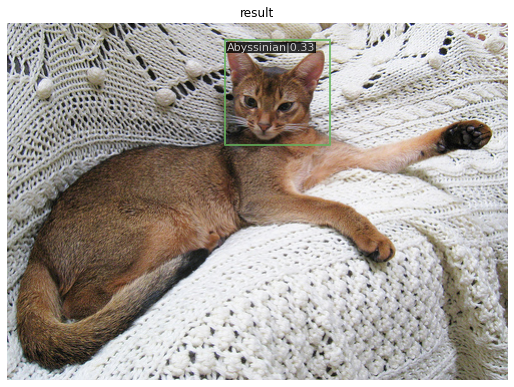

In [41]:
# checkpoint에 저장된 모델 파일
checkpoint_file = '/content/gdrive/My Drive/pet_work_dir/epoch_2.pth'

# checkpoint에 저장된 모델 파일을 활용해 모델 생성, 이때 Config는 앞서 오버라이딩한 config 사용
model_ckpt = init_detector(cfg, checkpoint_file, device='cuda:0')

# BGR Image 사용 
img = cv2.imread('/content/data/images/Abyssinian_88.jpg')

# 여기서 이미지 array 대신 이미지 경로를 전달하면 오류 발생
result = inference_detector(model_ckpt, img)
show_result_pyplot(model_ckpt, img, result, score_thr=0.3)

## 여러 이미지를 활용해 Inference 수행
* inference_detector(model, imgs) 에서 인자 imgs는 단일 이미지일 경우 string/array, 여러개의 이미지일 경우 list(string/array)를 입력
* show_result_pyplot(model_ckpt, img, result, score_thr=0.3)는 여러개의 이미지를 한번에 나타내기 어려우므로 별도의 시각화 함수 get_detected_img()를 이용

In [42]:
val_df

,img_name,class_id,etc1,etc2,class_name
1895,Abyssinian_1,1,1,1,Abyssinian
14,Abyssinian_113,1,1,1,Abyssinian
20,Abyssinian_119,1,1,1,Abyssinian
1856,Abyssinian_156,1,1,1,Abyssinian
1867,Abyssinian_168,1,1,1,Abyssinian
...,...,...,...,...,...
3639,yorkshire_terrier_154,37,2,25,yorkshire_terrier
3640,yorkshire_terrier_155,37,2,25,yorkshire_terrier
3662,yorkshire_terrier_175,37,2,25,yorkshire_terrier
3676,yorkshire_terrier_188,37,2,25,yorkshire_terrier


In [43]:
val_df['img_path'] = '/content/data/images/' + val_df['img_name'] + '.jpg'
val_df.head()

,img_name,class_id,etc1,etc2,class_name,img_path
1895,Abyssinian_1,1,1,1,Abyssinian,/content/data/images/Abyssinian_1.jpg
14,Abyssinian_113,1,1,1,Abyssinian,/content/data/images/Abyssinian_113.jpg
20,Abyssinian_119,1,1,1,Abyssinian,/content/data/images/Abyssinian_119.jpg
1856,Abyssinian_156,1,1,1,Abyssinian,/content/data/images/Abyssinian_156.jpg
1867,Abyssinian_168,1,1,1,Abyssinian,/content/data/images/Abyssinian_168.jpg


In [44]:
val_df[val_df['img_path'].str.contains('Abyssinian')]['img_path'].values

array(['/content/data/images/Abyssinian_1.jpg',
       '/content/data/images/Abyssinian_113.jpg',
       '/content/data/images/Abyssinian_119.jpg',
       '/content/data/images/Abyssinian_156.jpg',
       '/content/data/images/Abyssinian_168.jpg',
       '/content/data/images/Abyssinian_170.jpg',
       '/content/data/images/Abyssinian_179.jpg',
       '/content/data/images/Abyssinian_182.jpg',
       '/content/data/images/Abyssinian_183.jpg',
       '/content/data/images/Abyssinian_191.jpg'], dtype=object)

In [45]:
val_paths = val_df[val_df['img_path'].str.contains('Abyssinian')]['img_path'].values
val_imgs = [cv2.imread(x) for x in val_paths]

In [46]:
type(val_imgs), len(val_imgs), val_imgs[0].shape

(list, 10, (400, 600, 3))

In [47]:
# 반환된 results는 개별 원소로 list를 가지는 list임. 
results = inference_detector(model_ckpt, val_imgs)

In [48]:
len(results), len(results[0]), results

(10, 37, [[array([[3.2701285e+02, 7.0024704e+01, 4.2887076e+02, 1.6369493e+02,
           3.9771491e-01]], dtype=float32),
   array([], shape=(0, 5), dtype=float32),
   array([], shape=(0, 5), dtype=float32),
   array([], shape=(0, 5), dtype=float32),
   array([], shape=(0, 5), dtype=float32),
   array([], shape=(0, 5), dtype=float32),
   array([], shape=(0, 5), dtype=float32),
   array([[3.3218283e+02, 6.9205017e+01, 4.1807858e+02, 1.5299713e+02,
           9.2422426e-02]], dtype=float32),
   array([], shape=(0, 5), dtype=float32),
   array([[3.2974628e+02, 7.2088776e+01, 4.2645642e+02, 1.6155307e+02,
           1.6333134e-01]], dtype=float32),
   array([], shape=(0, 5), dtype=float32),
   array([[3.3351691e+02, 6.9753937e+01, 4.2354138e+02, 1.6190259e+02,
           8.7984815e-02]], dtype=float32),
   array([], shape=(0, 5), dtype=float32),
   array([], shape=(0, 5), dtype=float32),
   array([], shape=(0, 5), dtype=float32),
   array([], shape=(0, 5), dtype=float32),
   array([], sha

In [49]:
PET_CLASSES = pet_df['class_name'].unique().tolist()
labels_to_names_seq = {i:k for i, k in enumerate(PET_CLASSES)}

def get_detected_img(model, img_array,  score_threshold=0.3):
  '''모델과 원본 이미지 array, 필터링할 신뢰도 임계값을 인자로 갖는 inference 시각화 함수'''
  img_array_copy = img_array.copy() # image_array 복사
  bbox_color=(0, 255, 0) # 경계 박스 색상
  text_color=(0, 0, 255) # 텍스트 색상

  # Inference 수행
  # results는 2차원 array(형상=(객체 개수, 5)) 80개를 갖는 리스트
  results = inference_detector(model, img_array)

  # 80개의 array를 원소로 갖는 results 리스트를 순회하며 개별 2차원 array를 추출하고 이를 바탕으로 이미지 시각화 
  # results 리스트의 위치 index가 COCO에 매핑된 클래스 id. 여기서는 result_idx가 클래스 id임
  ## 개별 2차원 array에는 객체별 좌표와 객체 신뢰도 점수가 있음
  for result_idx, result in enumerate(results):
    if len(result) == 0: # 개별 2차원 array가 비어있으면 건너뛰기
      continue
    
    # 2차원 array에서 5번째 열의 값이 신뢰도 점수이며, 이 값이 신뢰도 임계값(score_threshold)보다 높은 값만 추출
    result_filtered = result[np.where(result[:, 4] > score_threshold)]
    
    # 해당 객체 클래스별로 탐지된 여러 개 객체 정보가 2차원 array에 담겨 있으며,
    # 이 2차원 array 개수만큼 순회하며 개별 객체의 좌표값 추출
    for i in range(len(result_filtered)):
      # 좌상단, 우하단 좌표 추출
      xmin = int(result_filtered[i, 0])
      ymin = int(result_filtered[i, 1])
      xmax = int(result_filtered[i, 2])
      ymax = int(result_filtered[i, 3])

      obj_class = labels_to_names_seq[result_idx] # 객체 클래스명
      confidence_score = result_filtered[i, 4] # 신뢰도 점수
      
      caption = f'{obj_class}: {confidence_score:.4f}' # 경계 박스 위에 표시할 텍스트 캡션
      cv2.rectangle(img_array_copy, (xmin, ymin), (xmax, ymax), color=bbox_color, thickness=2) # 경계 박스 표시
      cv2.putText(img_array_copy, caption, (int(xmin), int(ymin - 7)), # 텍스트 표시
                  cv2.FONT_HERSHEY_SIMPLEX, 0.6, text_color, 1) 

  return img_array_copy

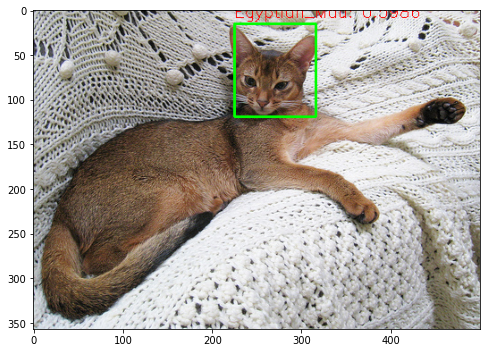

In [54]:
import matplotlib.pyplot as plt

img_arr = cv2.imread('/content/data/images/Abyssinian_88.jpg')

detected_img = get_detected_img(model, img_arr, score_threshold=0.3)
## detect 입력된 이미지는 bgr임. 이를 최종 출력시 rgb로 변환 
detected_img = cv2.cvtColor(detected_img, cv2.COLOR_BGR2RGB) # BGR을 RGB 타입으로 변경

plt.figure(figsize=(8, 8))
plt.imshow(detected_img);

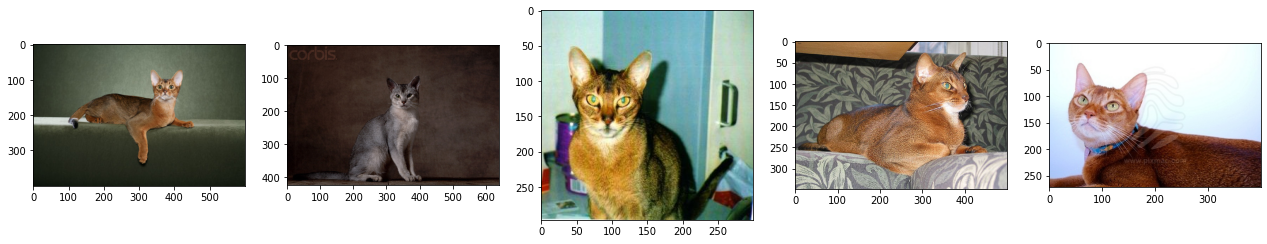

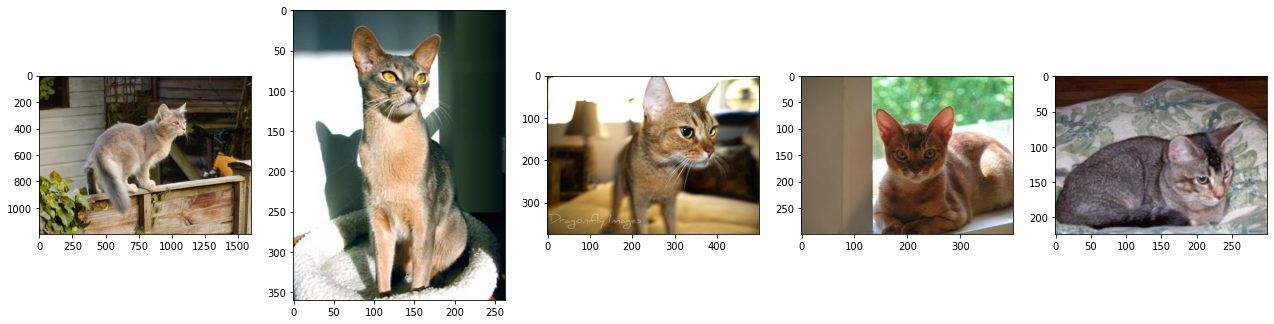

In [51]:
def show_detected_img(model, img_arrays, ncols=5):
    fig, axes = plt.subplots(figsize=(22, 6), nrows=1, ncols=ncols)
    for i in range(ncols):
      detected_img = get_detected_img(model, img_arrays[i], score_threshold=0.5)
      detected_img = cv2.cvtColor(detected_img, cv2.COLOR_BGR2RGB)
      axes[i].imshow(detected_img)
        
show_detected_img(model_ckpt, val_imgs[:5], ncols=5)
show_detected_img(model_ckpt, val_imgs[5:10], ncols=5)

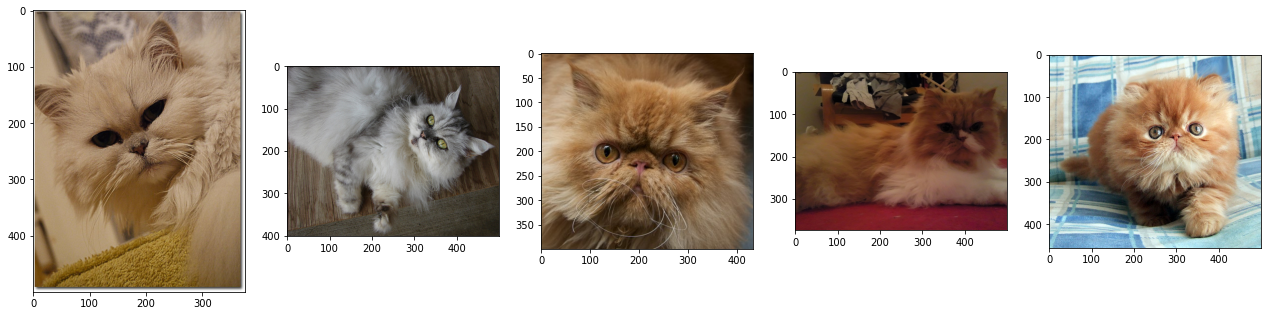

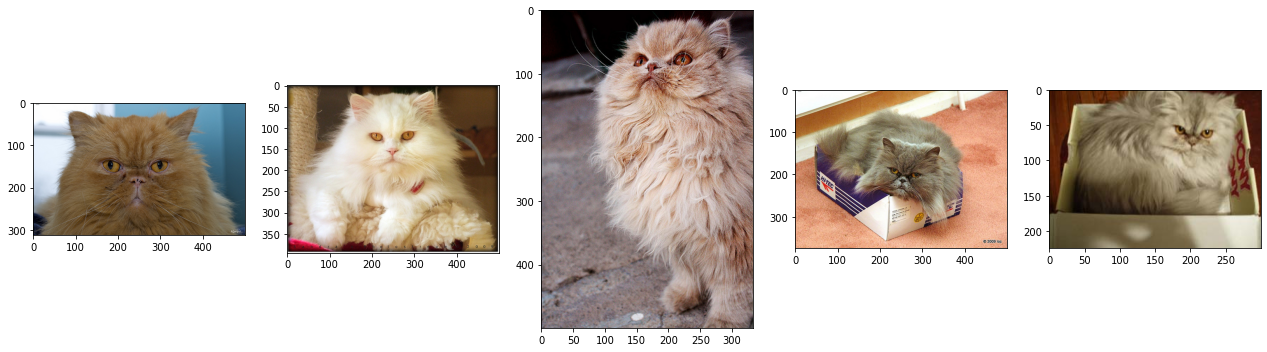

In [52]:
val_paths = val_df[val_df['img_path'].str.contains('Persian')]['img_path'].values
val_imgs = [cv2.imread(x) for x in val_paths]

show_detected_img(model_ckpt, val_imgs[:5], ncols=5)
show_detected_img(model_ckpt, val_imgs[5:10], ncols=5)